In [4]:
# Project: DataGuard AI - Anomaly Detection and Classification

import pandas as pd
mydata = pd.read_csv(r'C:\Users\DCS\Desktop\RT_IOT2022.csv')
print(mydata)


          no  id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0          0      38667       1883   tcp    mqtt      32.011598             9   
1          1      51143       1883   tcp    mqtt      31.883584             9   
2          2      44761       1883   tcp    mqtt      32.124053             9   
3          3      60893       1883   tcp    mqtt      31.961063             9   
4          4      51087       1883   tcp    mqtt      31.902362             9   
...      ...        ...        ...   ...     ...            ...           ...   
123112  2005      59247      63331   tcp       -       0.000006             1   
123113  2006      59247      64623   tcp       -       0.000007             1   
123114  2007      59247      64680   tcp       -       0.000006             1   
123115  2008      59247      65000   tcp       -       0.000006             1   
123116  2009      59247      65129   tcp       -       0.000006             1   

        bwd_pkts_tot  fwd_d

In [5]:

# Display the first few rows to understand the structure
print(mydata.head())



   no  id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0   0      38667       1883   tcp    mqtt      32.011598             9   
1   1      51143       1883   tcp    mqtt      31.883584             9   
2   2      44761       1883   tcp    mqtt      32.124053             9   
3   3      60893       1883   tcp    mqtt      31.961063             9   
4   4      51087       1883   tcp    mqtt      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  active.std  \
0             5                  3                  3  ...         0.0   
1             5                  3                  3  ...         0.0   
2             5                  3                  3  ...         0.0   
3             5                  3                  3  ...         0.0   
4             5                  3                  3  ...         0.0   

       idle.min      idle.max      idle.tot      idle.avg  idle.std  \
0  2.972918e+07  2.972918e+07  2.972918

In [6]:
# Inspect the Data:
# Check for missing values.
# Understand the features and identify potential labels or target columns for anomaly detection.
print(mydata.info())
print(mydata.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no                        123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [7]:
# Handle Missing Values:
mydata.fillna(method='ffill', inplace=True)
print(mydata)

          no  id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0          0      38667       1883   tcp    mqtt      32.011598             9   
1          1      51143       1883   tcp    mqtt      31.883584             9   
2          2      44761       1883   tcp    mqtt      32.124053             9   
3          3      60893       1883   tcp    mqtt      31.961063             9   
4          4      51087       1883   tcp    mqtt      31.902362             9   
...      ...        ...        ...   ...     ...            ...           ...   
123112  2005      59247      63331   tcp       -       0.000006             1   
123113  2006      59247      64623   tcp       -       0.000007             1   
123114  2007      59247      64680   tcp       -       0.000006             1   
123115  2008      59247      65000   tcp       -       0.000006             1   
123116  2009      59247      65129   tcp       -       0.000006             1   

        bwd_pkts_tot  fwd_d

In [8]:
print(mydata.columns)

Index(['no', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
  

In [9]:
# Feature Engineering:
# Convert categorical data to numerical using encoding.
# Extract relevant features like timestamps or user activity.
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Convert all object type (categorical) columns to numeric
for column in mydata.select_dtypes(include=['object']).columns:
    mydata[column] = encoder.fit_transform(mydata[column])



In [11]:
print(mydata)

          no  id.orig_p  id.resp_p  proto  service  flow_duration  \
0          0      38667       1883      1        5      32.011598   
1          1      51143       1883      1        5      31.883584   
2          2      44761       1883      1        5      32.124053   
3          3      60893       1883      1        5      31.961063   
4          4      51087       1883      1        5      31.902362   
...      ...        ...        ...    ...      ...            ...   
123112  2005      59247      63331      1        0       0.000006   
123113  2006      59247      64623      1        0       0.000007   
123114  2007      59247      64680      1        0       0.000006   
123115  2008      59247      65000      1        0       0.000006   
123116  2009      59247      65129      1        0       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9             5                  3                  3  ...   
1        

In [12]:
# Set the feature columns (excluding the target column 'Attack_type')
X = mydata.drop(['Attack_type'], axis=1)  # Features (drop 'Attack_type' column)
y = mydata['Attack_type']  # Target variable (attack type)



In [14]:
print(X)

          no  id.orig_p  id.resp_p  proto  service  flow_duration  \
0          0      38667       1883      1        5      32.011598   
1          1      51143       1883      1        5      31.883584   
2          2      44761       1883      1        5      32.124053   
3          3      60893       1883      1        5      31.961063   
4          4      51087       1883      1        5      31.902362   
...      ...        ...        ...    ...      ...            ...   
123112  2005      59247      63331      1        0       0.000006   
123113  2006      59247      64623      1        0       0.000007   
123114  2007      59247      64680      1        0       0.000006   
123115  2008      59247      65000      1        0       0.000006   
123116  2009      59247      65129      1        0       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9             5                  3                  3  ...   
1        

In [16]:
print(y)

0         3
1         3
2         3
3         3
4         3
         ..
123112    9
123113    9
123114    9
123115    9
123116    9
Name: Attack_type, Length: 123117, dtype: int32


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [19]:
print(X_train)

           no  id.orig_p  id.resp_p  proto  service  flow_duration  \
98060   77269      39749         21      1        0       0.000000   
99961   79170      64642         21      1        0       0.000004   
54605   33814      36728         21      1        0       0.000001   
119887   1370      64222      17417      2        0       0.000000   
21492     701       3541         21      1        0       0.000005   
...       ...        ...        ...    ...      ...            ...   
119879   1362      64177      17836      2        0       0.000000   
103694  82903        500         21      1        0       0.000001   
860       860      44813       1883      1        5      62.051374   
15795    3288      53270        443      1        9      19.557496   
121958    851      36242       9917      1        0       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
98060              1             0                  1                  0  ... 

In [21]:
print(X_test)

           no  id.orig_p  id.resp_p  proto  service  flow_duration  \
76235   55444       7315         21      1        0       0.000001   
36557   15766      18609         21      1        0       0.000004   
84102   63311      14663         21      1        0       0.000002   
3245     3245      37827       1883      1        5      62.052435   
114798  94007      22348         21      1        0       0.000000   
...       ...        ...        ...    ...      ...            ...   
14127    1620      60959         53      2        2       0.191379   
31441   10650      13492         21      1        0       0.000002   
34149   13358      16200         21      1        0       0.000004   
49234   28443      31354         21      1        0       0.000002   
93211   72420      29955         21      1        0       0.000000   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
76235              1             1                  1                  0  ... 

In [24]:
print(y_train)

98060     2
99961     2
54605     2
119887    8
21492     2
         ..
119879    8
103694    2
860       3
15795     0
121958    9
Name: Attack_type, Length: 86181, dtype: int32


In [26]:
print(y_test)

76235     2
36557     2
84102     2
3245      3
114798    2
         ..
14127     0
31441     2
34149     2
49234     2
93211     2
Name: Attack_type, Length: 36936, dtype: int32


In [27]:
# Choose Algorithms:
# Isolation Forest for anomaly detection.
# Random Forest or Gradient Boosting for classification.
from sklearn.ensemble import IsolationForest, RandomForestClassifier

# Anomaly Detection Model
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(X_train)

# Classification Model
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Evaluate the Anomaly Detector:
y_pred = iso_forest.predict(X_test)
print("Anomaly Detection Results:", y_pred)



Anomaly Detection Results: [1 1 1 ... 1 1 1]


In [28]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [34]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_class = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2306
           1       0.99      0.99      0.99       154
           2       1.00      1.00      1.00     28409
           3       1.00      1.00      1.00      1273
           4       1.00      0.73      0.84        11
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00       622
           7       1.00      1.00      1.00       319
           8       0.99      0.99      0.99       750
           9       1.00      0.99      1.00       582
          10       1.00      0.99      0.99      2424
          11       1.00      0.95      0.97        79

    accuracy                           1.00     36936
   macro avg       1.00      0.96      0.98     36936
weighted avg       1.00      1.00      1.00     36936



In [35]:
print(y_pred_class)

[2 2 2 ... 2 2 2]


In [36]:
print(y_test, y_pred_class)

76235     2
36557     2
84102     2
3245      3
114798    2
         ..
14127     0
31441     2
34149     2
49234     2
93211     2
Name: Attack_type, Length: 36936, dtype: int32 [2 2 2 ... 2 2 2]


In [39]:
import seaborn as sb 
import matplotlib.pyplot  as plt 

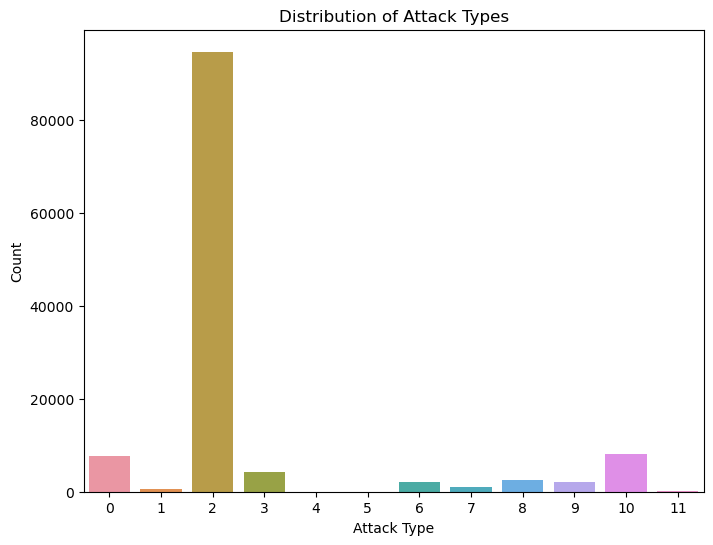

In [43]:
# Data Visualization:
# Visualize distribution of 'Attack_type' (target variable)
plt.figure(figsize=(8, 6))
sb.countplot(x='Attack_type', data=mydata)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

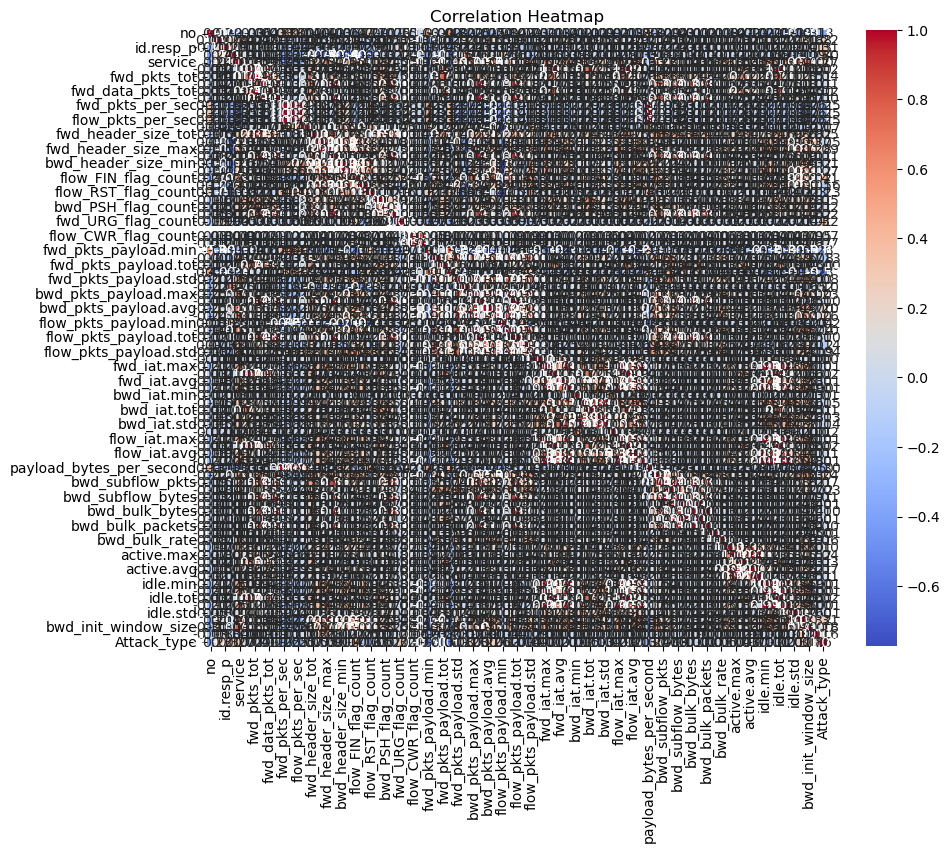

In [45]:
# Visualize correlations between features
plt.figure(figsize=(10, 8))
sb.heatmap(mydata.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

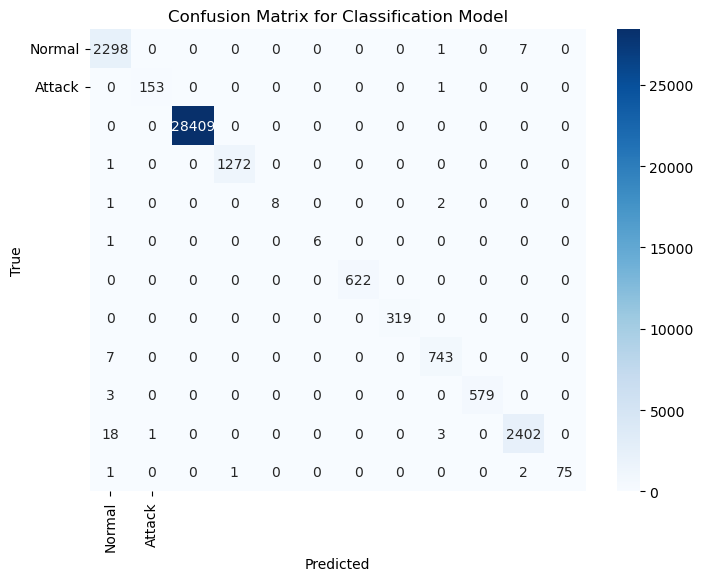

In [46]:
# Additional Visualization of Model Performance
# Plotting confusion matrix for classification model
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix for Classification Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()